## Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

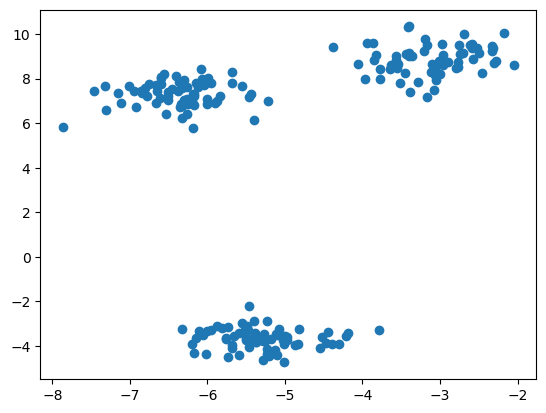

In [3]:
X,y=make_blobs(n_samples=200,centers=3,cluster_std=0.5)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
model=KMeans(n_clusters=3)
model.fit(X)

C:\Users\DONFACK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DONFACK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [5]:
model.predict(X) # ou model.labels_

array([1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0,
       1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0,
       1, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0,
       2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1,
       0, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 2, 2,
       0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2,
       0, 2])

In [7]:
model.cluster_centers_ # pour les coordonnees de nos clusters

array([[-5.30245481, -3.66562011],
       [-6.37080308,  7.28835346],
       [-3.11329089,  8.84131887]])

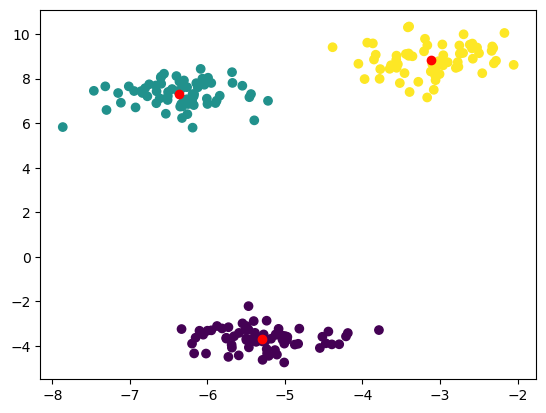

-116.45767971794058


116.4576797179406

In [11]:
plt.scatter(X[:,0],X[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r')
plt.show()
print(model.score(X))
model.inertia_

In [20]:
inertia=[]
k_range=range(1,20)
for k in k_range :
    model=KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)
    

C:\Users\DONFACK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DONFACK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DONFACK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DONFACK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

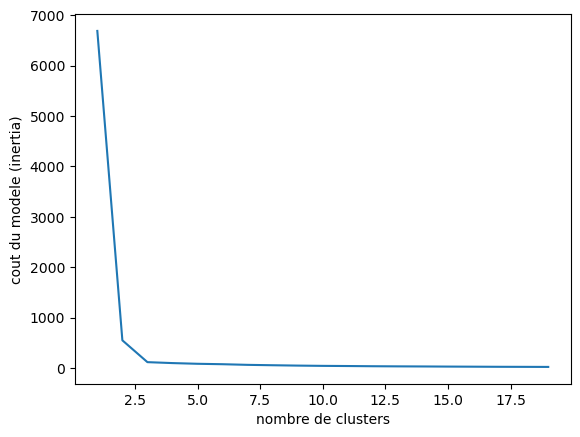

In [21]:
plt.plot(k_range,inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('cout du modele (inertia)')
plt.show()

## Detection d'anomalies

In [32]:
X,y=make_blobs(n_samples=50,centers=1,cluster_std=0.5)
X[-1,:]=np.array([2.25,5])

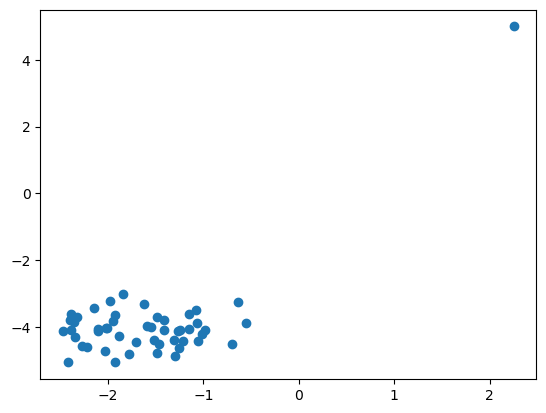

In [33]:
plt.scatter(X[:,0],X[:,1])

In [34]:
from sklearn.ensemble import IsolationForest

In [35]:
model=IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

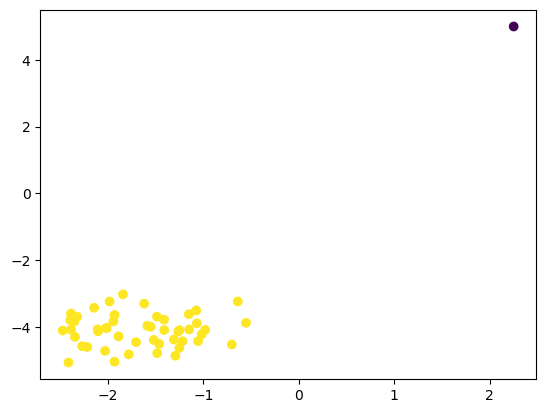

In [37]:
plt.scatter(X[:,0],X[:,1],c=model.predict(X))

## Application Decontamination Digits

In [38]:
from sklearn.datasets import load_digits

In [39]:
digits=load_digits()
images=digits.images
    
X=digits.data
y=digits.target

print(X.shape)

(1797, 64)


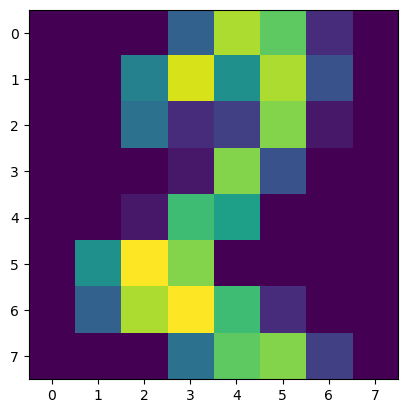

In [42]:
plt.imshow(images[50])

In [43]:
model=IsolationForest(random_state=0,contamination=0.02)
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [44]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
outliers=model.predict(X)==-1
outliers

array([False, False, False, ..., False, False, False])

In [58]:
images[outliers]

array([[[ 0.,  0.,  0., ..., 15.,  4.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        ...,
        [ 0.,  9., 16., ...,  1.,  0.,  0.],
        [ 0.,  3.,  8., ...,  9.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.]],

       [[ 0.,  6., 16., ..., 15., 10.,  0.],
        [ 0.,  9., 16., ...,  6.,  5.,  0.],
        [ 0., 12., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  1.,  5., ...,  0.,  0.,  0.],
        [ 0.,  9., 16., ...,  0.,  0.,  0.]],

       [[ 0.,  4., 16., ..., 16.,  5.,  0.],
        [ 0., 11., 16., ...,  8.,  3.,  0.],
        [ 0., 10., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0.,  4., 16., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

In [55]:
 images[outliers][0]

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

Text(0.5, 1.0, '2')

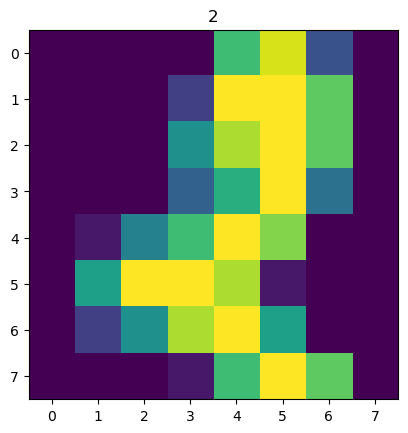

In [59]:
plt.imshow( images[outliers][0])
plt.title(y[outliers][0])

## Reduction de dimension

### 1- Visualisation des donnees

In [60]:
from sklearn.decomposition import PCA

In [61]:
X.shape

(1797, 64)

In [65]:
model=PCA(n_components=2)
model.fit_transform(X)

array([[ -1.25946616,  21.27488667],
       [  7.95761178, -20.76869897],
       [  6.99192249,  -9.95599055],
       ...,
       [ 10.80128459,  -6.96024252],
       [ -4.87210062,  12.42394034],
       [ -0.34438975,   6.36555489]])

In [66]:
model.fit_transform(X).shape

(1797, 2)

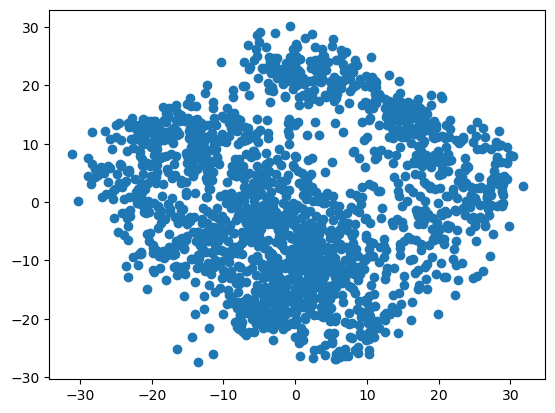

In [67]:
X_reduced=model.fit_transform(X)
plt.scatter(X_reduced[:,0],X_reduced[:,1])

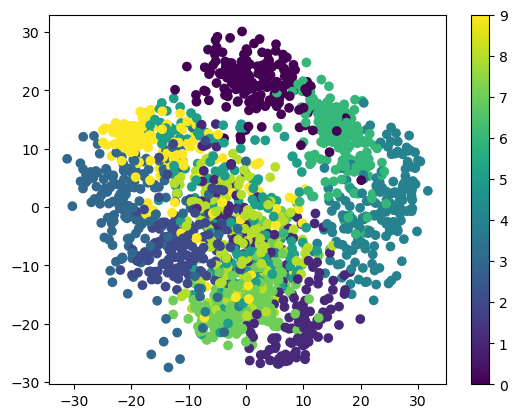

In [68]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y)
plt.colorbar()

In [69]:
model.components_

array([[-0.00000000e+00, -1.73094658e-02, -2.23428834e-01,
        -1.35913283e-01, -3.30323075e-02, -9.66340780e-02,
        -8.32942114e-03,  2.26900532e-03, -3.20516655e-04,
        -1.19308920e-01, -2.44451680e-01,  1.48512777e-01,
        -4.67319438e-02, -2.17740746e-01, -1.48136573e-02,
         4.47779857e-03, -4.94136993e-05, -7.95419645e-02,
         8.33951357e-02,  2.15915374e-01, -1.72126828e-01,
        -1.63712104e-01,  2.86444598e-02,  4.23251895e-03,
         9.85488356e-05,  6.42318909e-02,  2.54093294e-01,
        -3.56770753e-02, -2.09462581e-01, -4.31311297e-02,
         5.13118780e-02,  2.13422784e-04, -0.00000000e+00,
         1.59950867e-01,  3.68690765e-01,  1.64406830e-01,
         8.52007798e-02,  3.72983002e-02,  2.15867055e-02,
        -0.00000000e+00,  1.28865578e-03,  1.06945277e-01,
         3.03067451e-01,  2.47813035e-01,  2.09637287e-01,
         1.22325246e-02, -3.69458374e-02,  1.61485120e-03,
         6.93023656e-04, -8.35144211e-03, -5.58598907e-0

In [70]:
model.components_.shape

(2, 64)

### 2- Compression de donnees

In [81]:
from sklearn.decomposition import PCA

In [82]:
X.shape

(1797, 64)

In [83]:
model=PCA(n_components=64)
x_reduced=model.fit_transform(X)

In [84]:
model.explained_variance_ratio_ # Pourcntages de variance preserver par chacunes des composantes

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [85]:
np.cumsum(model.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

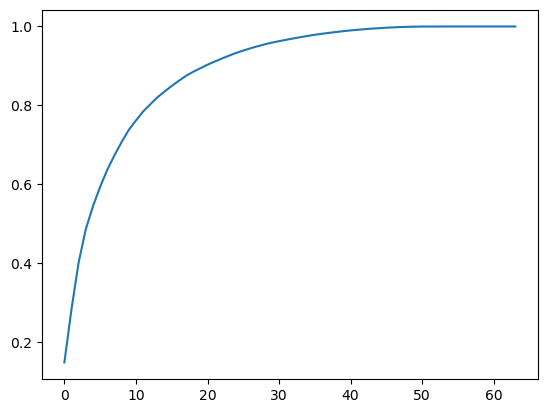

In [86]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [87]:
 np.argmax(np.cumsum(model.explained_variance_ratio_)>99)

0

In [90]:
model=PCA(n_components=0.95)
x_reduced=model.fit_transform(X)

In [92]:
model.n_components_

29